# Import and Setup

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
import importlib

plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

(-100.0, 1000.0)

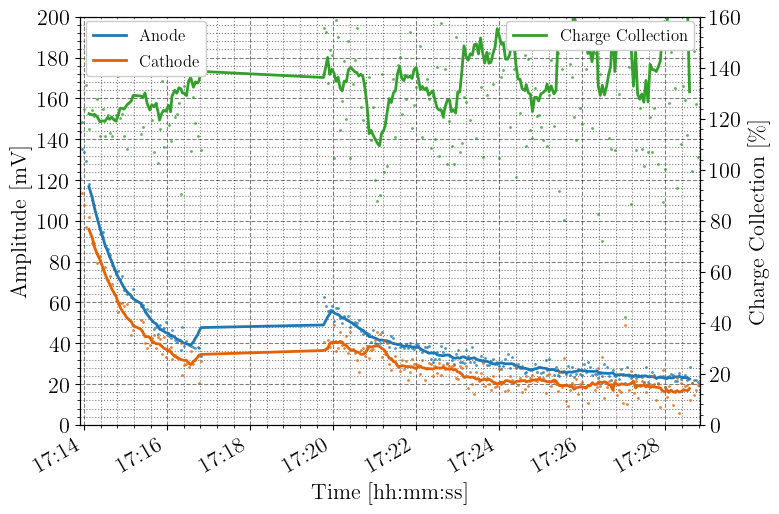

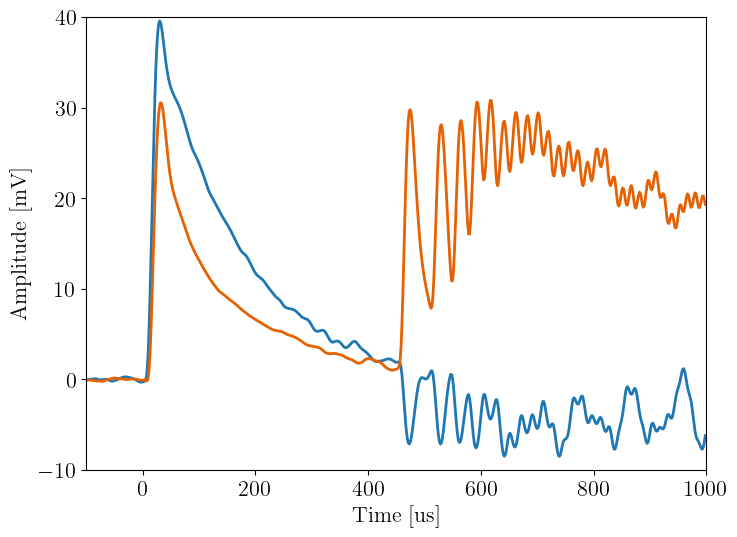

In [2]:
D1 = Dataset.Dataset(Path='C:/Data/20210526/', Selection='Vacuum*')
D1.RunStandardAnalysis()
D1.ShowAmplitudeVsTime(YTicks=20, YMax=200)

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[0].Amp,axis=0))
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[1].Amp,axis=0))
plt.xlim(-100,1000)

(-100.0, 1000.0)

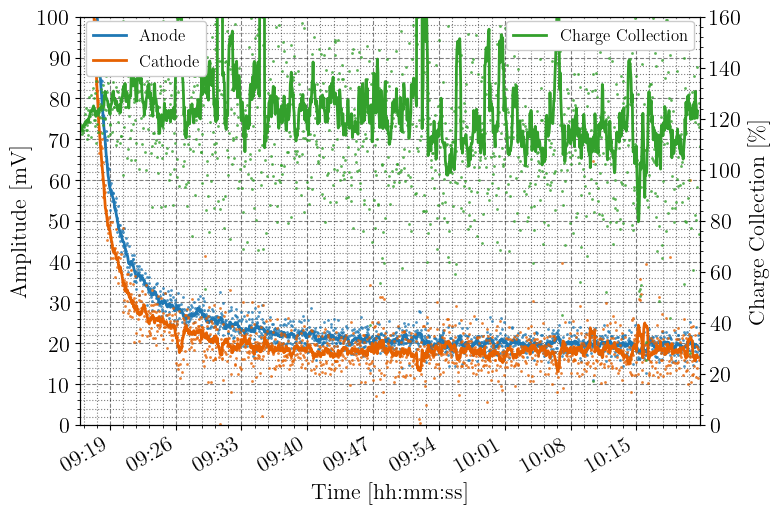

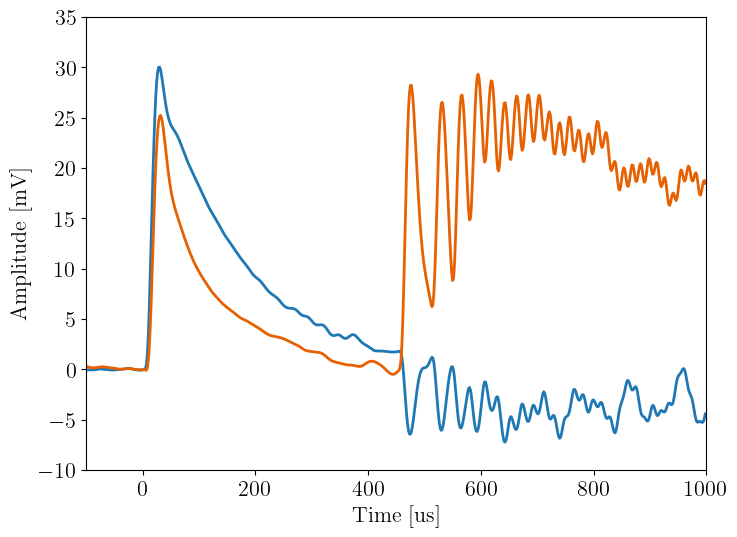

In [3]:
D2 = Dataset.Dataset(Path='C:/Data/20210527/', Selection='*BNL*')
D2.RunStandardAnalysis()
D2.ShowAmplitudeVsTime(YTicks=10, YMax=100)

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[0].Amp,axis=0))
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[1].Amp,axis=0))
plt.xlim(-100,1000)

(-100.0, 1000.0)

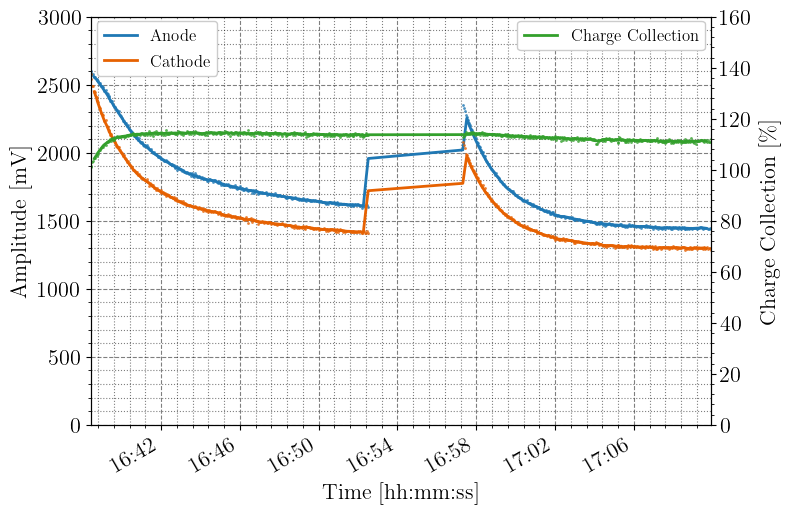

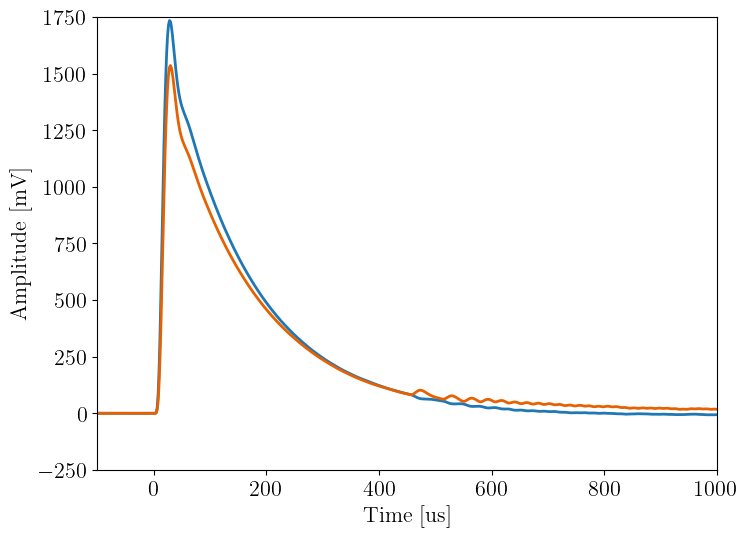

In [4]:
D3 = Dataset.Dataset(Path='C:/Data/20210527/', Selection='Vacuum*Sumita*')
D3.RunStandardAnalysis()
D3.ShowAmplitudeVsTime(YTicks=500, YMax=3000)
plt.savefig('20210527_cc.png')

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D3.Ch[0].Time, np.mean(D3.Ch[0].Amp,axis=0))
plt.plot(D3.Ch[0].Time, np.mean(D3.Ch[1].Amp,axis=0))
plt.xlim(-100,1000)

(-100.0, 1000.0)

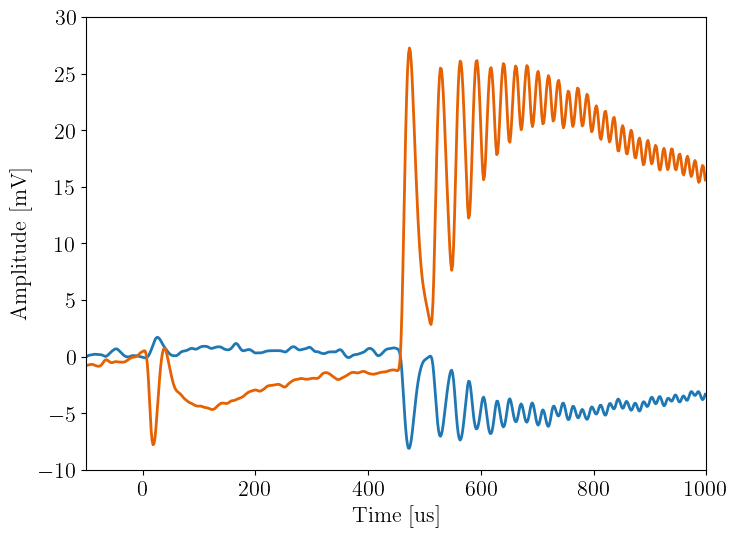

In [5]:
D4Noise = Dataset.Dataset(Path='C:/Data/20210527/', Selection='GXe_Noise*Sumita*')
D4Noise.RunStandardAnalysis()

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D4Noise.Ch[0].Time, np.mean(D4Noise.Ch[0].Amp,axis=0))
plt.plot(D4Noise.Ch[0].Time, np.mean(D4Noise.Ch[1].Amp,axis=0))
plt.xlim(-100,1000)

(-100.0, 1000.0)

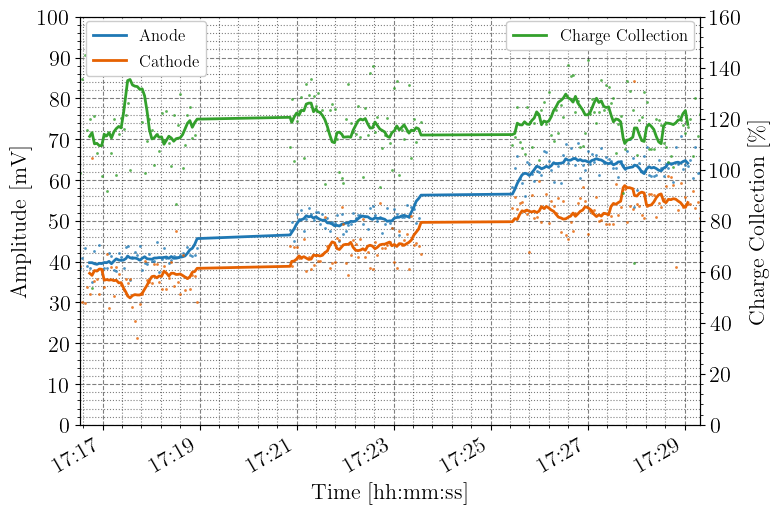

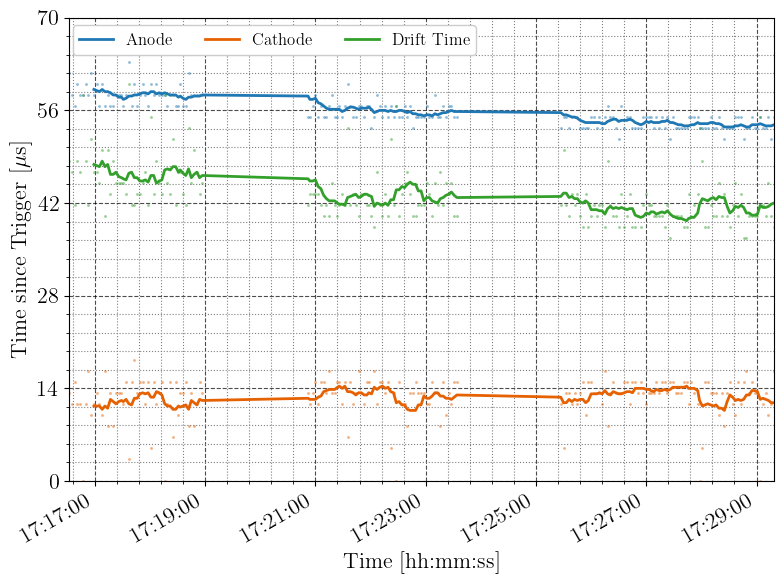

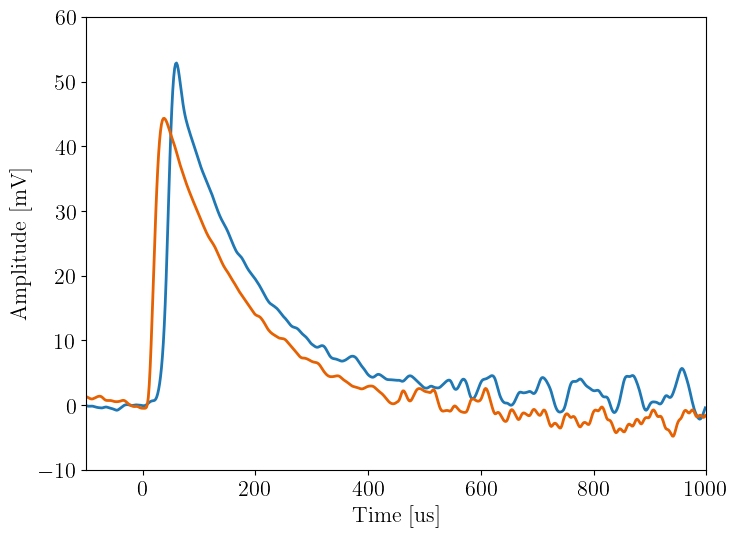

In [6]:
D4 = Dataset.Dataset(Path='C:/Data/20210527/', Selection='GXe_P*Sumita*')
D4.RunStandardAnalysis(NoiseDataset=D4Noise)
D4.ShowAmplitudeVsTime(YTicks=10, YMax=100)
D4.ShowDrifttimeVsTime()
# plt.savefig('20210527_cc.png')

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D4.Ch[0].Time, np.mean(D4.Ch[0].Amp,axis=0))
plt.plot(D4.Ch[0].Time, np.mean(D4.Ch[1].Amp,axis=0))
plt.xlim(-100,1000)

1.114576060268949


(-100.0, 1000.0)

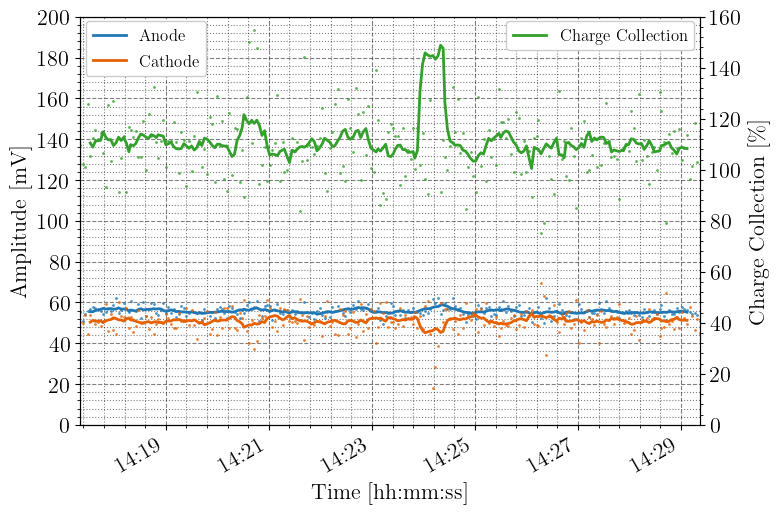

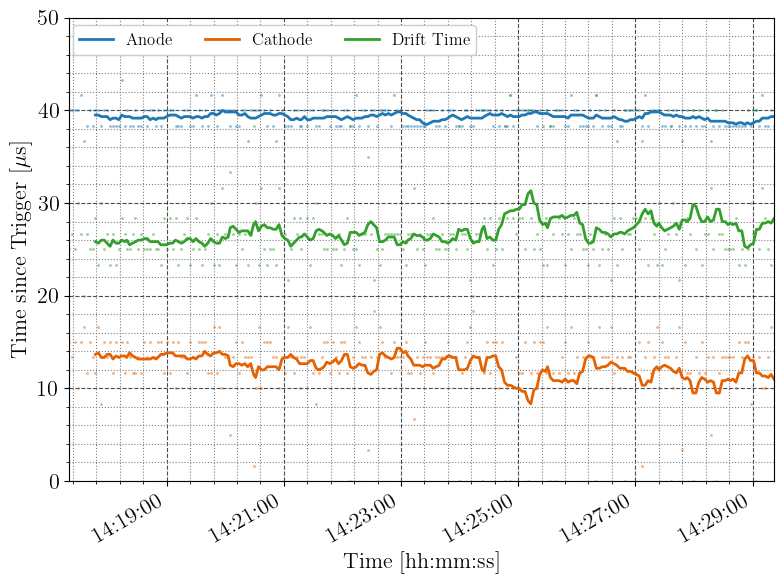

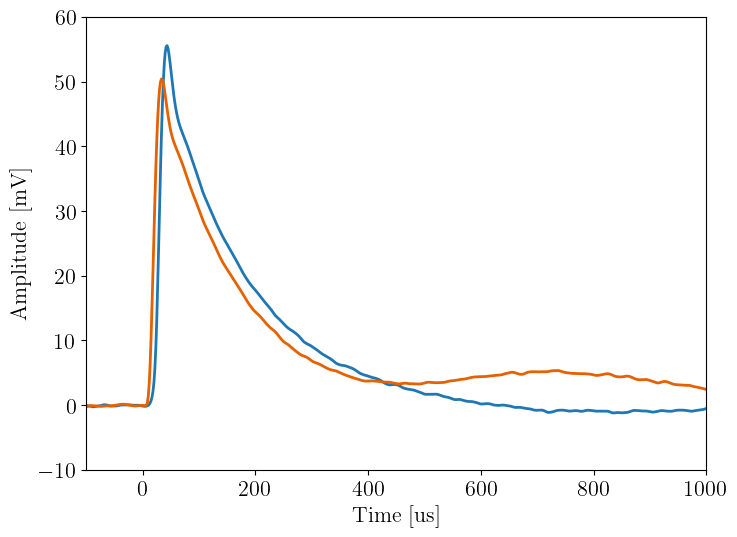

In [7]:
D5 = Dataset.Dataset(Path='C:/Data/20210528/', Selection='GXe_*Sumita_FiberR*')
D5.RunStandardAnalysis()
D5.ShowAmplitudeVsTime(YTicks=20, YMax=200)
D5.ShowDrifttimeVsTime()
# plt.savefig('20210527_cc.png')

print(np.mean(D5.ChargeCollection))


plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D5.Ch[0].Time, np.mean(D5.Ch[0].Amp,axis=0))
plt.plot(D5.Ch[0].Time, np.mean(D5.Ch[1].Amp,axis=0))
plt.xlim(-100,1000)


1.128488631028786


(-100.0, 200.0)

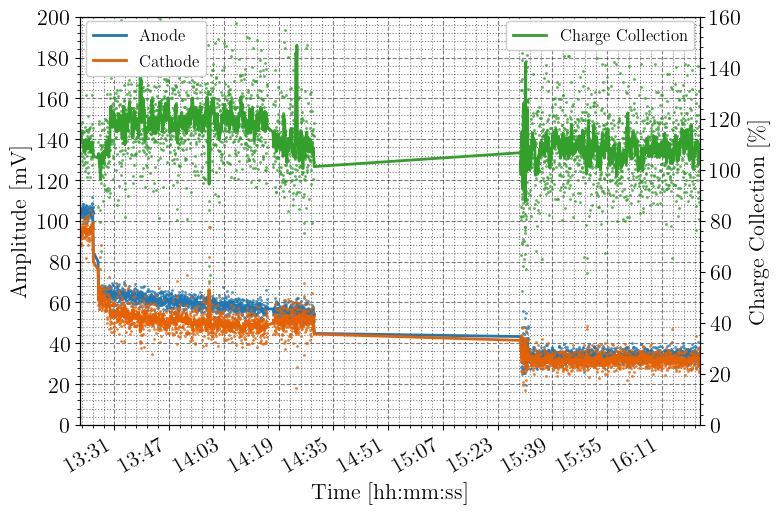

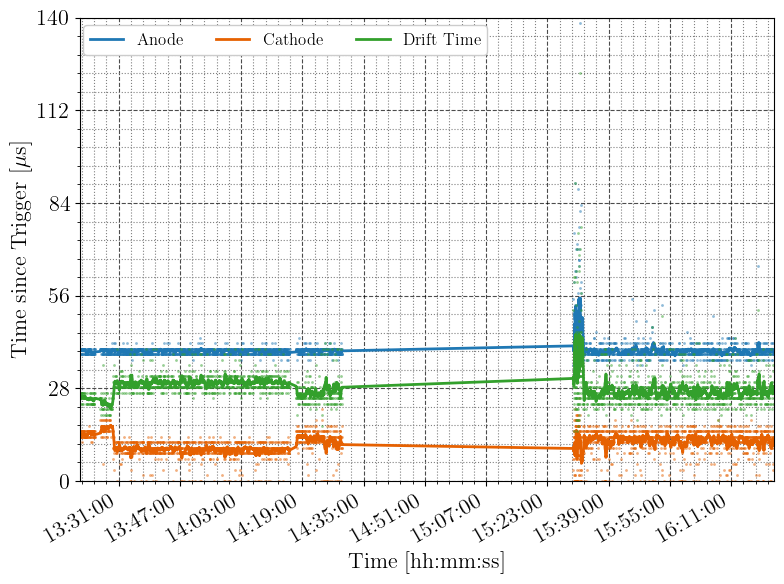

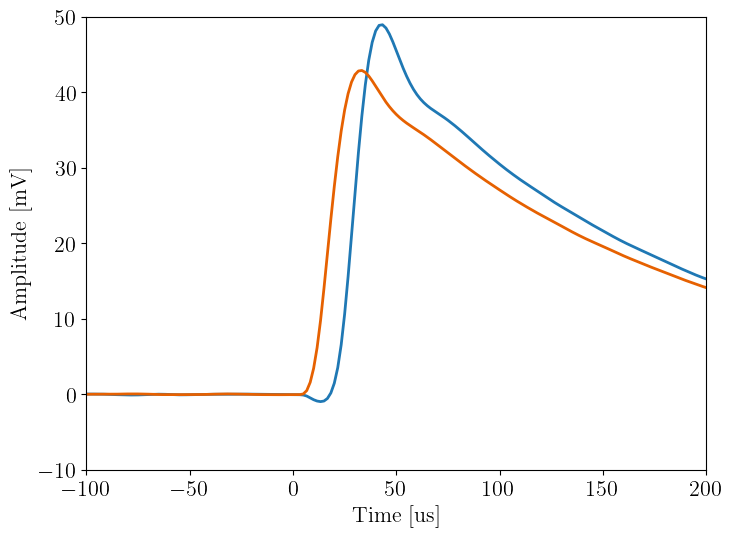

In [14]:
D6 = Dataset.Dataset(Path='C:/Data/20210528/', Selection='GXe*')
D6.RunStandardAnalysis()
D6.ShowAmplitudeVsTime(YTicks=20, YMax=200)
D6.ShowDrifttimeVsTime()

print(np.mean(D6.ChargeCollection))

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D6.Ch[0].Time, np.mean(D6.Ch[0].Amp,axis=0))
plt.plot(D6.Ch[0].Time, np.mean(D6.Ch[1].Amp,axis=0))
plt.xlim(-100,200)

1.1001873575141523 0.0020605001683661464
-0.13547584188615594
Charge Collection [%]: 110.02 +- -13.55
Drift time [us]: 28.36
Electron lifetime mean [us]: -296.97
Electron lifetime range [us]: -134.00  - 789.27


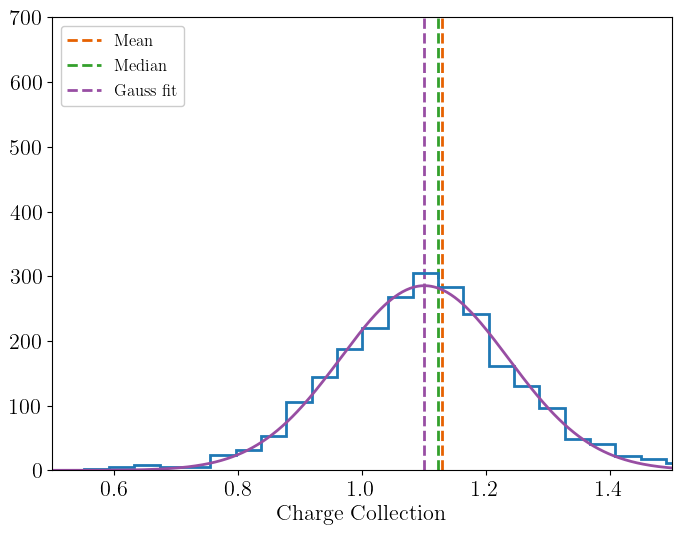

In [16]:
from scipy.optimize import curve_fit

def gauss(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

plt.figure()
plt.xlabel('Charge Collection')
plt.xlim(0.5,1.5)
hist = plt.hist(D6.ChargeCollection, bins=np.linspace(0,2,50), histtype='step', lw=2, align='left')
plt.vlines(x=np.mean(D6.ChargeCollection), ymin=0, ymax=700, color=colors[1], ls='--', label='Mean')
plt.vlines(x=np.median(D6.ChargeCollection), ymin=0, ymax=700, color=colors[2], ls='--', label='Median')

popt,pcov = curve_fit(gauss, hist[1][:-1], hist[0])
xfit = np.linspace(0,2,1000)
plt.plot(xfit, gauss(xfit, *popt), color=colors[3])

plt.vlines(x=popt[1], ymin=0, ymax=700, color=colors[3], ls='--', label='Gauss fit')
err = np.sqrt(np.diag(pcov)) 

print(popt[1], err[1])
print(popt[2])

cc = popt[1]
cc_err = popt[2]
dtime = np.mean(D6.DriftTime)
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime mean [us]: {:.2f}".format(lifetime))
print("Electron lifetime range [us]: {:.2f}  - {:.2f}".format(lifetime_lo, lifetime_hi))

plt.legend(loc='upper left')
plt.savefig('old.png')

plt.show()

 | Filename... C:/Data/20210601\Vacuum_C-50V_A-300V_0.h5
 | Number of files in ch1...	 100/100
 | Number of files in ch2...	 100/100
 | Filename... C:/Data/20210601\Vacuum_C-50V_A-300V_1.h5
 | Number of files in ch1...	 50/150
 | Number of files in ch2...	 50/150
 | Filename... C:/Data/20210601\Vacuum_C-50V_A-300V_1_0.h5
 | Number of files in ch1...	 33/183
 | Number of files in ch2...	 33/183
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  23.03125 sec
1.1575107685271429


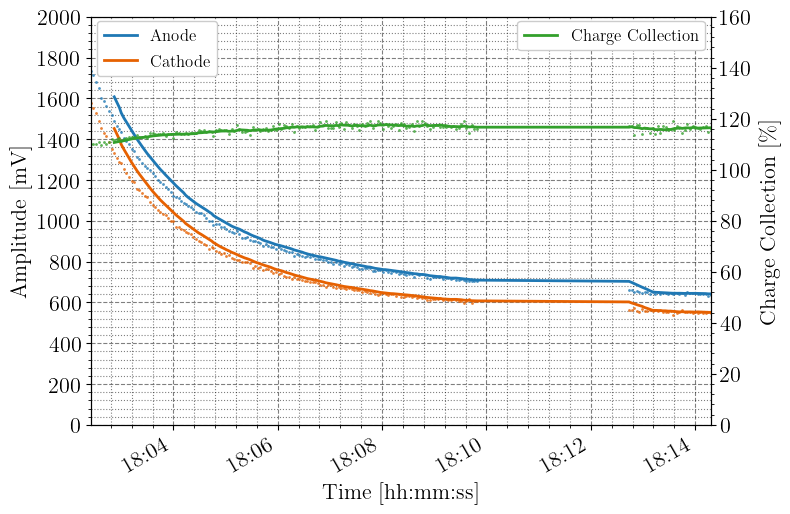

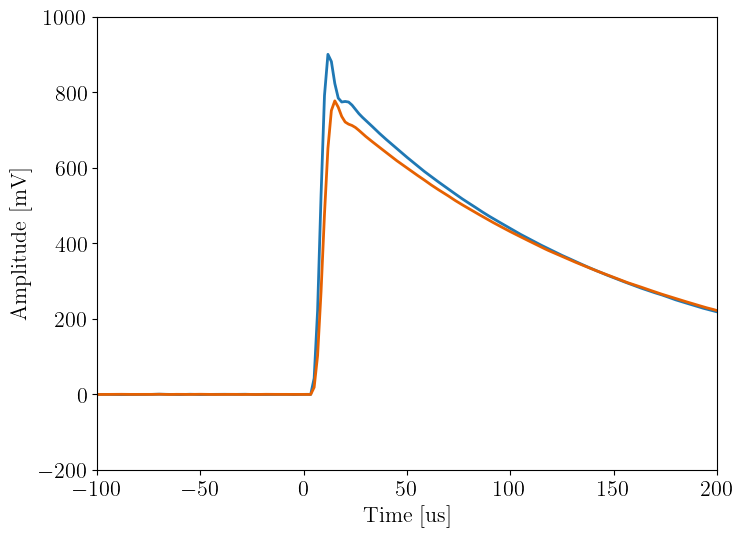

In [13]:
D7 = Dataset.Dataset(Path='C:/Data/20210601/', Selection='Vacuum*')
D7.RunStandardAnalysis()
D7.ShowAmplitudeVsTime(YTicks=200, YMax=2000)

print(np.mean(D7.ChargeCollection))

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D7.Ch[0].Time, np.mean(D7.Ch[0].Amp,axis=0))
plt.plot(D7.Ch[0].Time, np.mean(D7.Ch[1].Amp,axis=0))
plt.xlim(-100,200)
plt.show()